# Importing Library

In [1]:
# 각 라이브러리 사용 이유 추후 달 예정
from jbfg.pandas_utils import *
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle



# Loading Data

In [2]:
schema = 'l2_jbwc_extnl'

In [3]:

# sql = 'SELECT * FROM products_info'
# df_products_info = get_df(sql, schema)
# sql = 'SELECT * FROM train_x_past'
# train_x_past = get_df(sql, schema)
# sql = 'SELECT * FROM train_x_current'
# train_x_current = get_df(sql, schema)
# sql = 'SELECT * FROM train_y'
# train_y = get_df(sql, schema)
# sql = 'SELECT * FROM test_x_past'
# test_x_past = get_df(sql, schema)
# sql = 'SELECT * FROM test_x_current'
# test_x_current = get_df(sql, schema)

with open('data/df_products_info.pkl', 'rb') as f :
    df_products_info = pickle.load(f)
with open('data/train_x_past.pkl', 'rb') as f :
    train_x_past = pickle.load(f)
with open('data/train_x_current.pkl', 'rb') as f :
    train_x_current = pickle.load(f)
with open('data/train_y.pkl', 'rb') as f :
    train_y = pickle.load(f)
with open('data/test_x_past.pkl', 'rb') as f :
    test_x_past = pickle.load(f)    
with open('data/test_x_current.pkl', 'rb') as f :
    test_x_current = pickle.load(f)

# test_x_past를 Validation 
# text_x_current를 최종 test dataset?


In [4]:
test_x_current

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered
0,3412476,167350,36,4,19,6.0,11,1
1,3414026,17417,14,1,10,4.0,2,1
2,3376493,114026,37,1,10,11.0,1,1
3,3378444,157389,24,5,14,7.0,11,1
4,3410333,123619,19,4,17,6.0,22,0
...,...,...,...,...,...,...,...,...
14245,3319059,1563,40,3,12,2.0,5,1
14246,3391747,112044,1,5,11,,8,0
14247,3419370,181896,49,5,5,2.0,14,1
14248,3392035,189425,90,5,9,4.0,2,1


In [5]:
print("df_products_info :",df_products_info.shape)
print("train_x_past :",train_x_past.shape)
print("train_x_current :",train_x_current.shape)
print("train_y :",train_y.shape)
print("test_x_past :",test_x_past.shape)
print("test_x_current :",test_x_current.shape)


df_products_info : (100, 6)
train_x_past : (1253972, 10)
train_x_current : (24424, 8)
train_y : (24424, 1)
test_x_past : (827340, 9)
test_x_current : (14250, 8)


In [6]:
df_products_info.head()

,product_id,name,category_id,division_id,category_name,division_name
0,21709,Sparkling Lemon Water,115,7,water seltzer sparkling water,beverages
1,20995,Organic Broccoli Florets,116,1,frozen produce,frozen
2,33000,Pure Irish Butter,36,16,butter,dairy eggs
3,7781,Organic Sticks Low Moisture Part Skim Mozzarel...,21,16,packaged cheese,dairy eggs
4,47144,Unsweetened Original Almond Breeze Almond Milk,91,16,soy lactosefree,dairy eggs


In [7]:
train_x_past.head()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,is_past_current
0,717029,196613,15,1,9,3.0,5,0,41220,past
1,2325772,196613,35,6,11,2.0,7,1,41220,past
2,642668,196613,69,2,16,2.0,11,1,4210,past
3,1326515,196613,61,3,19,3.0,3,1,4210,past
4,1437845,196613,36,3,15,4.0,16,0,4210,past


In [8]:
train_x_current.head()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered
0,806422,41116,47,5,18,3.0,4,1
1,2146033,127113,45,1,10,7.0,24,1
2,3055498,140168,45,5,10,26.0,11,1
3,3267527,60604,52,0,16,8.0,2,1
4,3125992,136554,46,4,9,5.0,2,0


In [9]:
train_y.head()

,product_id
0,21709
1,21709
2,21709
3,21709
4,21709


# Check Missing Values

> 결측값 없음

In [10]:
print('df_product_info')
print('------------------------------')
print(df_products_info.isnull().sum())

print('train_x_past')
print('------------------------------')
print(train_x_past.isnull().sum())

print('train_x_current')
print('------------------------------')
print(train_x_current.isnull().sum())

print('train_y')
print('------------------------------')
print(train_y.isnull().sum())


df_product_info
------------------------------
product_id       0
name             0
category_id      0
division_id      0
category_name    0
division_name    0
dtype: int64
train_x_past
------------------------------
order_id           0
cstno              0
order_number       0
week_day           0
order_hour         0
order_interval     0
add_order          0
is_reordered       0
product_id         0
is_past_current    0
dtype: int64
train_x_current
------------------------------
order_id          0
cstno             0
order_number      0
week_day          0
order_hour        0
order_interval    0
add_order         0
is_reordered      0
dtype: int64
train_y
------------------------------
product_id    0
dtype: int64


order_interval 내 공백값('')인 결측값 존재 

# Concating Data

In [13]:
train_x_past

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,is_past_current
0,717029,196613,15,1,9,3.0,5,0,41220,past
1,2325772,196613,35,6,11,2.0,7,1,41220,past
2,642668,196613,69,2,16,2.0,11,1,4210,past
3,1326515,196613,61,3,19,3.0,3,1,4210,past
4,1437845,196613,36,3,15,4.0,16,0,4210,past
...,...,...,...,...,...,...,...,...,...,...
1253967,1902783,163819,47,0,19,13.0,2,1,24852,past
1253968,1969590,163819,42,1,15,6.0,3,1,24852,past
1253969,2549215,163819,9,1,11,7.0,1,1,24852,past
1253970,3103211,163819,39,1,14,7.0,3,1,24852,past


In [116]:
# df_products_info + train_current_past = base_df

base_df = pd.merge(left =  train_x_past, right = df_products_info,
                                 left_on = 'product_id', right_on = 'product_id').sort_values(by=['order_id'], ascending=False).reset_index(drop=True)
base_df


,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,is_past_current,name,category_id,division_id,category_name,division_name
0,999996,34552,14,5,17,5.0,3,1,18465,past,Organic Grade A Free Range Large Brown Eggs,86,16,eggs,dairy eggs
1,999996,34552,14,5,17,5.0,8,1,24852,past,Banana,24,4,fresh fruits,produce
2,999996,34552,14,5,17,5.0,1,1,49683,past,Cucumber Kirby,83,4,fresh vegetables,produce
3,999974,94872,40,6,9,3.0,6,1,35951,past,Organic Unsweetened Almond Milk,91,16,soy lactosefree,dairy eggs
4,999974,94872,40,6,9,3.0,1,1,21616,past,Organic Baby Arugula,123,4,packaged vegetables fruits,produce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253967,1000003,444,32,5,19,7.0,6,1,47626,past,Large Lemon,24,4,fresh fruits,produce
1253968,1000003,444,32,5,19,7.0,18,1,42265,past,Organic Baby Carrots,123,4,packaged vegetables fruits,produce
1253969,1000003,444,32,5,19,7.0,4,1,24184,past,Red Peppers,83,4,fresh vegetables,produce
1253970,1000003,444,32,5,19,7.0,2,1,13176,past,Bag of Organic Bananas,24,4,fresh fruits,produce


In [ ]:
# 수정된 df의 데이터형식 파악

base_df.dtypes

order_id           object
cstno              object
order_number       object
week_day           object
order_hour         object
order_interval     object
add_order          object
is_reordered       object
product_id         object
is_past_current    object
name               object
category_id        object
division_id        object
category_name      object
division_name      object
dtype: object

# Data Exploration

> 1. train data 內 past, current Data 비교base_df

> 1. 재구매(reorder) 및 재구매 x 비율 파악

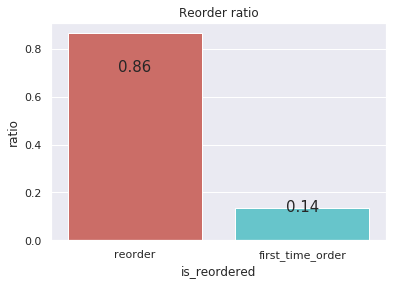

In [117]:
sns.set_theme()

reorder_per = base_df['is_reordered'].value_counts()/len(base_df)

ax = sns.barplot(x=reorder_per.index, y=reorder_per.values, palette='hls')

ax.set_ylabel('ratio')
ax.set_xlabel('is_reordered')
ax.set_xticklabels(['reorder','first_time_order'])
ax.set_title('Reorder ratio')


for p in ax.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() + p.get_width()/2.
    txt_y = 0.8*p.get_height()
    ax.text(txt_x, txt_y, txt, fontsize=15,ha='center', va='bottom')
    
    
#전체 구매내역에서 재구매데이터는 87% 비율을 가짐


> 2. 구매(최소 1건이상) 상품의 분포 파악

In [118]:
# 상품 종류는 총 몇건인지
print('총 {}건'.format(base_df['name'].nunique())) 
print('----------------------------------------')
print(base_df['name'].unique())

총 100건
----------------------------------------
['Organic Grade A Free Range Large Brown Eggs' 'Banana' 'Cucumber Kirby'
 'Organic Unsweetened Almond Milk' 'Organic Baby Arugula' 'Limes'
 'Organic Blueberries' 'Organic Strawberries' 'Organic Avocado'
 'Spring Water' 'Organic Garlic' 'Organic Baby Spinach' 'Large Lemon'
 'Organic Blackberries' 'Organic Tomato Cluster'
 'Organic Whole String Cheese' 'Sparkling Water Grapefruit'
 'Bag of Organic Bananas' 'Organic Yellow Onion'
 'Organic Reduced Fat 2% Milk' 'Organic Half & Half' 'Granny Smith Apples'
 '100% Raw Coconut Water' 'Organic Baby Carrots'
 'Organic Small Bunch Celery' 'Organic Lacinato (Dinosaur) Kale'
 'Organic Bartlett Pear' 'Original Hummus' 'Organic Granny Smith Apple'
 'Organic Fuji Apple' 'Organic Black Beans'
 'Organic Peeled Whole Baby Carrots' 'Yellow Onions' 'Hass Avocados'
 'Organic Broccoli' 'Organic Cucumber' 'Michigan Organic Kale'
 'Organic Grape Tomatoes' 'Unsalted Butter'
 'Organic Garnet Sweet Potato (Yam)' '2%

In [119]:
# 구매상품내 상품별 비중

prdt_df = base_df.groupby(['name'])['name'].size().reset_index(name='order_ratio').sort_values(by='order_ratio', ascending=False)
prdt_df['order_ratio'] = prdt_df['order_ratio']/base_df['order_id'].nunique()
prdt_df.set_index('name', inplace=True)
prdt_df['rank'] = prdt_df['order_ratio'].rank(ascending=False)
prdt_df = prdt_df.round(3)
prdt_df

,order_ratio,rank
name,,
Banana,0.219,1.0
Bag of Organic Bananas,0.198,2.0
Organic Strawberries,0.155,3.0
Organic Hass Avocado,0.125,4.0
Organic Baby Spinach,0.117,5.0
...,...,...
Garlic,0.012,96.0
Unsweetened Original Almond Breeze Almond Milk,0.012,97.0
Roma Tomato,0.011,98.0


<function matplotlib.pyplot.show(*args, **kw)>

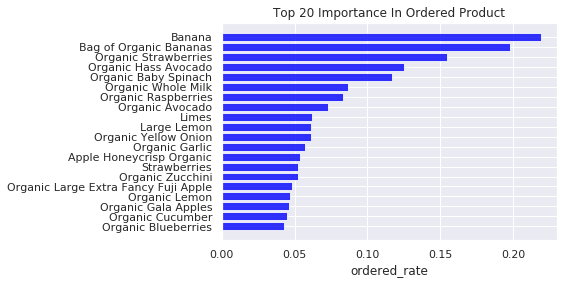

In [120]:
# 구매이력있는 상품비중 상위 20가지를 택하여 vertical chart로 구성

prdt_df_20 = prdt_df.head(20)
y_pos = prdt_df_20.index

plt.barh(y_pos,prdt_df_20['order_ratio'], align='center', alpha=0.8, color='blue')
plt.xlabel('ordered_rate')
plt.title('Top 20 Importance In Ordered Product')
plt.gca().invert_yaxis()
plt.show